In [ ]:
# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

In [1]:
tickers = ['AMZN','AAPL','WBA','NOC','BA','LMT']

start_date = '2010-01-01'
end_date = '2020-11-01'

import yfinance as yf

df = yf.download(tickers, start_date, end_date)[['Adj Close']]
df.head()

[*********************100%***********************]  6 of 6 completed


Adj Close                                                    
                AAPL    AMZN         BA        LMT        NOC        WBA
Date                                                                    
2010-01-04  6.496295  6.6950  43.777542  50.106224  38.601665  25.593061
2010-01-05  6.507525  6.7345  45.211338  50.627815  38.669559  25.387224
2010-01-06  6.404015  6.6125  46.582809  49.884563  38.818947  25.195107
2010-01-07  6.392177  6.5000  48.468571  48.515354  39.219547  25.346054
2010-01-08  6.434672  6.6760  48.001011  49.297749  39.002274  25.380363

In [2]:
import pandas as pd
import numpy as np

In [4]:
weights = np.array([.25, .3, .15, .10, .24, .7])
initial_investment = 5_000_000

In [3]:
returns = df.pct_change()
returns.tail()

Adj Close                                                  
                AAPL      AMZN        BA       LMT       NOC       WBA
Date                                                                  
2020-10-26  0.000087  0.000824 -0.039018 -0.015441  0.004571 -0.021819
2020-10-27  0.013472  0.024724 -0.034757 -0.016606 -0.024916 -0.032518
2020-10-28 -0.046312 -0.037595 -0.045736 -0.031923 -0.028002 -0.039167
2020-10-29  0.037050  0.015249  0.001013  0.004503 -0.004325 -0.030934
2020-10-30 -0.056018 -0.054456 -0.026300 -0.006555 -0.008790  0.015513

In [5]:
cov_matrix = returns.cov()
cov_matrix

Adj Close                                                  
                    AAPL      AMZN        BA       LMT       NOC       WBA
Adj Close AAPL  0.000318  0.000159  0.000161  0.000093  0.000098  0.000098
          AMZN  0.000159  0.000401  0.000135  0.000081  0.000092  0.000096
          BA    0.000161  0.000135  0.000486  0.000162  0.000165  0.000131
          LMT   0.000093  0.000081  0.000162  0.000174  0.000150  0.000088
          NOC   0.000098  0.000092  0.000165  0.000150  0.000204  0.000097
          WBA   0.000098  0.000096  0.000131  0.000088  0.000097  0.000303

In [ ]:
conf_level1 = 0.05
avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
var_1d1 = initial_investment - cutoff1
var_1d1

In [ ]:
var_arry = []
num_days = int(10)

for x in range(1, num_days+1):
    var_arry.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(var_arry, color="navy")
plt.xlabel("No. of Days")
plt.ylabel("MaX Portfolio Loss (USD)")
plt.show()

In [9]:
start_date = '2010-11-01'
end_date = '2020-11-01'
ticker = 'NOC'

df = yf.download(ticker, start_date, end_date)
df['return'] = df['Adj Close'].pct_change().fillna(0)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2010-11-01,57.245762,58.257679,56.974709,57.381287,44.143490,1736469,0.000000
2010-11-02,57.833035,58.438381,57.833035,58.357063,44.894161,1724073,0.017005
2010-11-03,58.221539,58.501625,57.354179,58.076981,44.678696,1598450,-0.004799
2010-11-04,58.483555,59.143108,58.140224,58.971443,45.366798,2213614,0.015401
2010-11-05,58.926270,59.260567,58.826885,59.034691,45.415466,1043940,0.001073


In [25]:
#!pip install pandas-datareader

In [19]:
from pandas_datareader import data
import pandas_montecarlo

In [20]:
#!pip install pandas_montecarlo --upgrade --no-cache-dir

In [21]:
mc = df['return'].montecarlo(sims=10, bust=-0.1, goal=1)

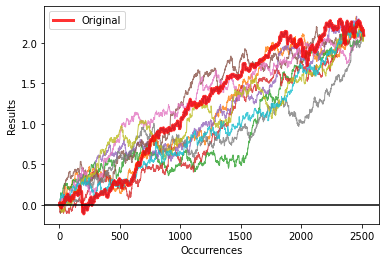

In [22]:
mc.plot(title="")

In [23]:
pd.DataFrame(mc.data).head()

,original,1,2,3,4,5,6,7,8,9
0,0.000000,0.002463,0.015018,-0.005157,-0.004843,-0.000996,0.020862,-0.007589,-0.007090,0.020482
1,0.017005,0.016076,0.023958,-0.000642,-0.007167,-0.009301,0.003373,0.013072,0.003820,0.008415
2,-0.004799,0.003310,0.000186,-0.028278,0.006561,0.001595,0.012789,-0.018022,-0.003301,-0.013436
3,0.015401,-0.004829,0.005969,-0.032545,0.011193,-0.010845,-0.000530,-0.011450,-0.004151,-0.010366
4,0.001073,-0.003662,0.012976,-0.001464,-0.015158,-0.004978,-0.003631,0.031701,0.003600,0.003820


In [24]:
ev = pd.DataFrame(mc.stats, index=["s"])
ev

,min,max,mean,median,std,maxdd,bust,goal
s,2.092521,2.092521,2.092521,2.092521,2.812565e-15,-0.109557,0.3,0.7
